## Import the ANN model

In [10]:
# Import the model saved as h5 file
from keras.models import load_model

ANN_model = load_model(f'CPTI_hardening_ANN.h5')
# The model takes strain rate, temperature and plastic strain as the inputs
# The output is stress of the material

In [11]:
# Print the model summary
ANN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 16)                64        
                                                                 
 dense_50 (Dense)            (None, 16)                272       
                                                                 
 dense_51 (Dense)            (None, 16)                272       
                                                                 
 dense_52 (Dense)            (None, 16)                272       
                                                                 
 dense_53 (Dense)            (None, 16)                272       
                                                                 
 dense_54 (Dense)            (None, 16)                272       
                                                                 
 dense_55 (Dense)            (None, 1)                

In [12]:
for layer in ANN_model.layers:
    if hasattr(layer, 'activation'):
        print(f"Layer: {layer.name}, Activation Function: {layer.activation.__name__}")


Layer: dense_49, Activation Function: softplus
Layer: dense_50, Activation Function: softplus
Layer: dense_51, Activation Function: softplus
Layer: dense_52, Activation Function: softplus
Layer: dense_53, Activation Function: softplus
Layer: dense_54, Activation Function: softplus
Layer: dense_55, Activation Function: linear


## Import the data to test

In [19]:
import pandas as pd
test_data=pd.read_csv("test_dataset_CPTI.txt", sep="\t")
test_data

Str rate       Temp    Strain      Stress
0     0.0074  -0.862152  0.000773  268.894155
1     0.0074  -0.337995  0.001000  270.256494
2     0.0074   0.712791  0.006352  289.308133
3     0.0074   1.709856  0.014188  304.084547
4     0.0074   2.788221  0.023090  315.949205
5     0.0074   3.841416  0.031337  325.025698
6     0.0074   4.868414  0.039256  332.801592
7     0.0074   5.880045  0.046818  339.671456
8     0.0074   6.864003  0.054936  346.623943
9     0.0074   7.956978  0.062717  352.981627
10    0.0074   9.070514  0.070725  359.285977
11    0.0074  10.159930  0.077810  364.701664
12    0.0074  11.119000  0.085962  370.778702
13    0.0074  12.233990  0.093627  376.368006
14    0.0074  13.058590  0.101565  382.048671
15    0.0074  14.060190  0.108745  387.105956
16    0.0074  14.905200  0.115725  391.957905
17    0.0074  15.699960  0.123896  397.567589
18    0.0074  16.447610  0.131354  402.628526
19    0.0074  17.186620  0.138524  407.446924
20    0.0074  17.925370  0.146486  412.748539
21    0.0074  18.637320  0.153371  417.296331
22    0.0074  19.354560  0.160682  422.090806
23    0.0074  20.045490  0.168349  427.083640

The attached dataset belongs to an actual UT experiment on CP-Ti at varying temperature (between -0.86 and 20.05 degree celsius) and at constant strain rate of 0.0074/s
In the dataset

The column  Str rate=> strain rate (/s)
            Temp=> Temperature (degree celsius)
            Strain=> Plastic strain level

Stress=>target stress (to compare with the predictions)


In [14]:
# split the data to inputs and targets
inputs=test_data[["Str rate","Temp","Strain"]]
targets=test_data[["Stress"]]


In [15]:
# Define the max and min values as dictionaries (from training data)

max_values = {
    "Str rate": 0.01, "Temp": 20, "Strain": 1
}

min_values = {
    "Str rate": 0.001, "Temp": -10, "Strain": 0
}

# Create a DataFrame
normalization_df = pd.DataFrame({"Min": min_values, "Max": max_values})

# Display the DataFrame
print(normalization_df)


             Min    Max
Str rate   0.001   0.01
Temp     -10.000  20.00
Strain     0.000   1.00


# Normalize the inputs

In [16]:
normalized_inputs = (inputs- normalization_df["Min"]) / (normalization_df["Max"] - normalization_df["Min"])
normalized_inputs

Str rate      Temp    Strain
0   0.711111  0.304595  0.000773
1   0.711111  0.322067  0.001000
2   0.711111  0.357093  0.006352
3   0.711111  0.390329  0.014188
4   0.711111  0.426274  0.023090
5   0.711111  0.461381  0.031337
6   0.711111  0.495614  0.039256
7   0.711111  0.529335  0.046818
8   0.711111  0.562133  0.054936
9   0.711111  0.598566  0.062717
10  0.711111  0.635684  0.070725
11  0.711111  0.671998  0.077810
12  0.711111  0.703967  0.085962
13  0.711111  0.741133  0.093627
14  0.711111  0.768620  0.101565
15  0.711111  0.802006  0.108745
16  0.711111  0.830173  0.115725
17  0.711111  0.856665  0.123896
18  0.711111  0.881587  0.131354
19  0.711111  0.906221  0.138524
20  0.711111  0.930846  0.146486
21  0.711111  0.954577  0.153371
22  0.711111  0.978485  0.160682
23  0.711111  1.001516  0.168349

In [17]:
#Convert the input and target to numpy array
x=normalized_inputs.to_numpy()

#Feed the inputs to the ANN and get the predictions
predictions=ANN_model.predict(x)



1/1 [==============================] - 0s 80ms/step


## Plot the results

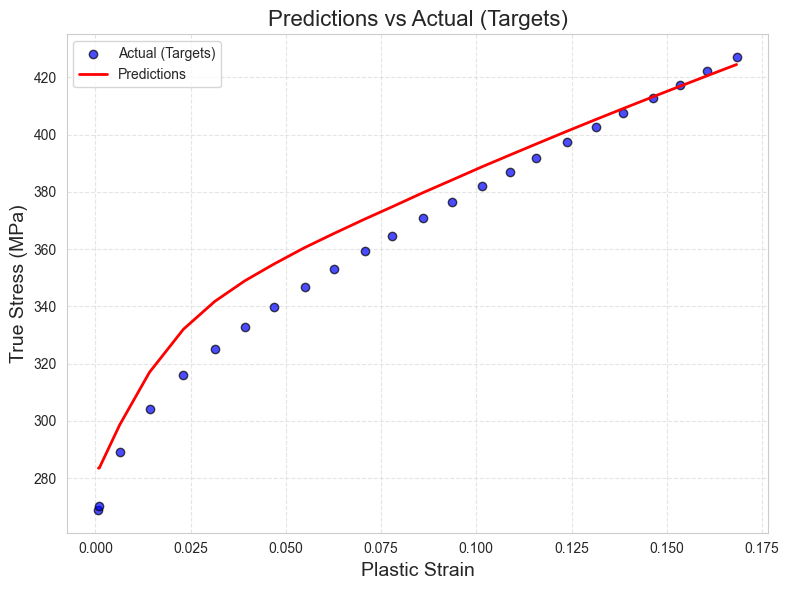

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 6))

# Scatter plot for targets (actual values)
plt.scatter(test_data["Strain"], targets, color='blue', label="Actual (Targets)", alpha=0.7, edgecolors='black')

# Line plot for predictions
plt.plot(test_data["Strain"], predictions, color='red', linestyle='-', linewidth=2, label="Predictions")

# Labels and title
plt.xlabel("Plastic Strain", fontsize=14)
plt.ylabel("True Stress (MPa)", fontsize=14)
plt.title("Predictions vs Actual (Targets)", fontsize=16)

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()
